**Support Vector Machine(SVM):**
It is supervised learning algorithm which is used for linear as well as for classification problem. But mostly used for classficaion problems. It works well when the dataset is small and complex.

Using SVM algorithm we try to seperate two classes using a hyperplane(Decision boundary).

There are two types of SVM:

Linear: In linear SVM the hyperplane is a line and we try to find the maximum margin

Non-Linear: In Non Linear SVM where more than two classes are involved. we use kernels tricks are used to seperate the classes.

**Support Vectors:**  The data points that are near to the hyperplane that are called as the support vectors.

**Margin:** The distance between the hyperplane and closest support vectors is considered as margin. There are two types of margin hard margin and soft margin.

**Note:** The best hyperplane is considered as maximum distance from the two classes and large margin is considerd as the good margin.

**Kernel:** When there is high dimensions in the data set kernel is used for the transformation of the data for the best decision boundary within the classes.

**Gaussian Radial Basis Function (RBF):**

It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

In [109]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [110]:
svm_dataset= pd.read_csv("/content/framingham.csv")

In [111]:
svm_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [112]:
svm_dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [113]:
svm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [114]:
svm_corr=svm_dataset.corr()

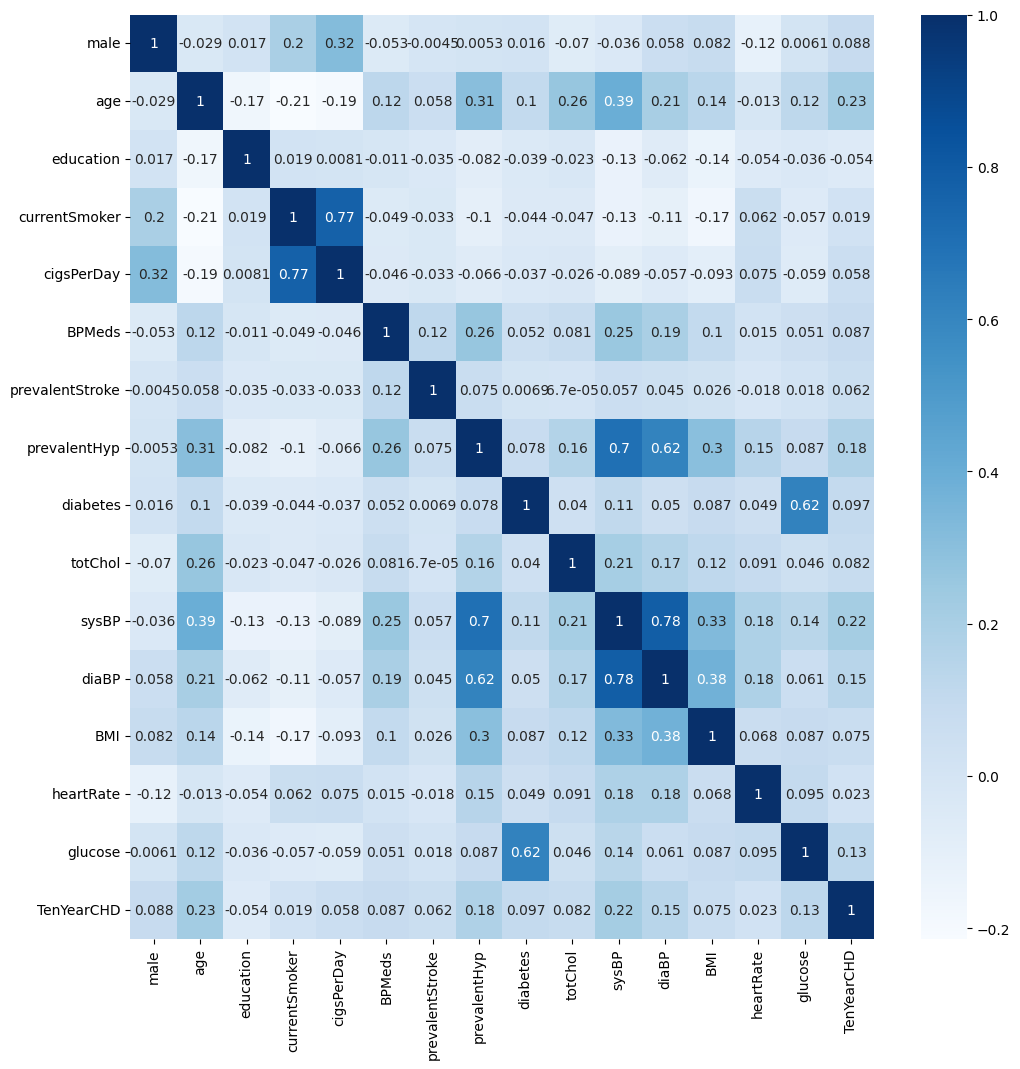

In [115]:
fig, ax = plt.subplots(figsize=(12, 12))
# drawing the plot
sns.heatmap(svm_corr,annot=True,cmap='Blues' ,ax=ax)
plt.show()

In [116]:
new_svm_datase=svm_dataset.drop(['currentSmoker','sysBP','diaBP','glucose'],axis=1)

In [117]:
svm_dataset= svm_dataset.dropna()

In [118]:
svm_features=svm_dataset.drop('TenYearCHD',axis=1)
svm_target=svm_dataset['TenYearCHD']

In [119]:
X_train,X_test,y_train,y_test=train_test_split(svm_features,svm_target,test_size=0.25)

In [120]:
#Building svm model
svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

In [125]:
round(svm_model.score(X_test,y_test)*100,2)

85.89

In [122]:
svm_predict= svm_model.predict(X_test)

In [123]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       914
           1       0.00      0.00      0.00         0

    accuracy                           0.86       914
   macro avg       0.50      0.43      0.46       914
weighted avg       1.00      0.86      0.92       914



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
